In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import gym
import numpy as np



In [2]:

#from termcolor import colored


def naive_sum_reward_agent(env, num_episodes=500):
    # this is the table that will hold our summated rewards for
    # each action in each state
    r_table = np.zeros((5, 2))
    val_pre = 0
    vals = []
    
    for g in range(num_episodes):
        s = env.reset()
        done = False
        step = 0
        while not done:
            if np.sum(r_table[s, :]) == 0:
                # make a random selection of actions
                act = np.random.randint(0, 2)
            else:
                # select the action with highest cummulative reward
                act = np.argmax(r_table[s, :])
            new_s, r, done, _ = env.step(act)
            r_table[s, act] += r
            s = new_s
            step += 1
        #print(r_table)
        val_curr=r_table.sum(axis=1).sum(axis=0)
        val = val_curr - val_pre
        vals.append(val)
        val_pre = val_curr
        #print('{blue}{val}{endcolor}'.format(blue='\033[36m', val=val, endcolor='\033[0m'))
        #print(step)
    #val=r_table.sum(axis=1).sum(axis=0)
    
    #print('{blue}{val}{endcolor}'.format(blue='\033[36m', val=val, endcolor='\033[0m'))
    #print(vals)
    print(max(vals))
    return vals #r_table



env = gym.make('NChain-v0')
env.reset
vals = naive_sum_reward_agent(env, 2000)




2228.0


In [3]:
data_y = vals
data_x = range(len(data_y))

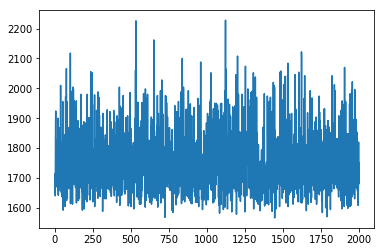

In [4]:
plt.plot(data_x, data_y)
plt.show()